In [31]:
!pip install numpy pandas scikit-learn torch pyreadr


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# import pyreadr
# #_r is because it is telling that it is r data file
# result = pyreadr.read_r("gefcom.rda")
# # gives the dataFrame now, in result only the dict like object was stored, gefcom contained the data frame
# df = result["gefcom"]


import pyreadr

# Define the path to your file on Drive
file_path = "/content/drive/MyDrive/ML_project/gefcom.rda"

# Read the file
result = pyreadr.read_r(file_path)

# Extract the DataFrame
df = result["gefcom"]

In [34]:
df.shape

(1241710, 15)

In [35]:
df.columns

Index(['ts', 'zone', 'demand', 'drybulb', 'dewpnt', 'date', 'year', 'month',
       'hour', 'day_of_week', 'day_of_year', 'weekend', 'holiday_name',
       'holiday', 'trend'],
      dtype='object')

In [36]:
df.head(1241710)

,ts,zone,demand,drybulb,dewpnt,date,year,month,hour,day_of_week,day_of_year,weekend,holiday_name,holiday,trend
0,2003-03-01 00:00:00,CT,3386.000,25.0,19.0,2003-03-01,2003.0,Mar,1.0,Sat,60.0,True,NaN,False,0.0
1,2003-03-01 01:00:00,CT,3258.000,23.0,18.0,2003-03-01,2003.0,Mar,2.0,Sat,60.0,True,NaN,False,1.0
2,2003-03-01 02:00:00,CT,3189.000,22.0,18.0,2003-03-01,2003.0,Mar,3.0,Sat,60.0,True,NaN,False,2.0
3,2003-03-01 03:00:00,CT,3157.000,22.0,19.0,2003-03-01,2003.0,Mar,4.0,Sat,60.0,True,NaN,False,3.0
4,2003-03-01 04:00:00,CT,3166.000,23.0,19.0,2003-03-01,2003.0,Mar,5.0,Sat,60.0,True,NaN,False,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241705,2017-04-30 19:00:00,WCMASS,1729.634,49.0,39.0,2017-04-30,2017.0,Apr,20.0,Sun,120.0,True,NaN,False,124195.0
1241706,2017-04-30 20:00:00,WCMASS,1743.125,49.0,36.0,2017-04-30,2017.0,Apr,21.0,Sun,120.0,True,NaN,False,124196.0
1241707,2017-04-30 21:00:00,WCMASS,1641.004,48.0,36.0,2017-04-30,2017.0,Apr,22.0,Sun,120.0,True,NaN,False,124197.0
1241708,2017-04-30 22:00:00,WCMASS,1494.189,48.0,36.0,2017-04-30,2017.0,Apr,23.0,Sun,120.0,True,NaN,False,124198.0


In [37]:
# this becomes a row selection mask=>df[ mask ], A mask is a per-row decision: True = keep the row, False = drop it.
train_df = df[(df['ts'].dt.year >= 2003) & (df['ts'].dt.year <= 2013)]
val_df   = df[(df['ts'].dt.year >= 2014) & (df['ts'].dt.year <= 2015)]
test_df  = df[(df['ts'].dt.year >= 2016) & (df['ts'].dt.year <= 2017)]


In [38]:
ZONE = "CT"   # or "TOTAL"

train_ct = train_df[train_df["zone"] == ZONE].copy()
val_ct   = val_df[val_df["zone"] == ZONE].copy()
test_ct  = test_df[test_df["zone"] == ZONE].copy()

# always sort by time inside the zone
train_ct = train_ct.sort_values("ts").reset_index(drop=True)
val_ct   = val_ct.sort_values("ts").reset_index(drop=True)
test_ct  = test_ct.sort_values("ts").reset_index(drop=True)

In [39]:
train_ct.head(35)

,ts,zone,demand,drybulb,dewpnt,date,year,month,hour,day_of_week,day_of_year,weekend,holiday_name,holiday,trend
0,2003-03-01 00:00:00,CT,3386.0,25.0,19.0,2003-03-01,2003.0,Mar,1.0,Sat,60.0,True,NaN,False,0.0
1,2003-03-01 01:00:00,CT,3258.0,23.0,18.0,2003-03-01,2003.0,Mar,2.0,Sat,60.0,True,NaN,False,1.0
2,2003-03-01 02:00:00,CT,3189.0,22.0,18.0,2003-03-01,2003.0,Mar,3.0,Sat,60.0,True,NaN,False,2.0
3,2003-03-01 03:00:00,CT,3157.0,22.0,19.0,2003-03-01,2003.0,Mar,4.0,Sat,60.0,True,NaN,False,3.0
4,2003-03-01 04:00:00,CT,3166.0,23.0,19.0,2003-03-01,2003.0,Mar,5.0,Sat,60.0,True,NaN,False,4.0
5,2003-03-01 05:00:00,CT,3255.0,23.0,20.0,2003-03-01,2003.0,Mar,6.0,Sat,60.0,True,NaN,False,5.0
6,2003-03-01 06:00:00,CT,3430.0,24.0,20.0,2003-03-01,2003.0,Mar,7.0,Sat,60.0,True,NaN,False,6.0
7,2003-03-01 07:00:00,CT,3684.0,24.0,20.0,2003-03-01,2003.0,Mar,8.0,Sat,60.0,True,NaN,False,7.0
8,2003-03-01 08:00:00,CT,3977.0,25.0,21.0,2003-03-01,2003.0,Mar,9.0,Sat,60.0,True,NaN,False,8.0
9,2003-03-01 09:00:00,CT,4129.0,27.0,22.0,2003-03-01,2003.0,Mar,10.0,Sat,60.0,True,NaN,False,9.0


In [40]:
import numpy as np

def add_cyclical_time_features(d, add_month=True):
    d = d.copy()

    # --- booleans → 0/1 (do this now, keeps tensors clean) ---
    d["weekend"] = d["weekend"].astype(int)
    d["holiday"] = d["holiday"].astype(int)

    # --- hour: your data is 1..24 → convert to 0..23 ---
    hour0 = (d["hour"].astype(int) - 1) % 24
    d["hour_sin"] = np.sin(2*np.pi*hour0/24)
    d["hour_cos"] = np.cos(2*np.pi*hour0/24)

    # --- day_of_week: Mon..Sun → 0..6 ---
    dow_map = {"Mon":0,"Tue":1,"Wed":2,"Thu":3,"Fri":4,"Sat":5,"Sun":6}
    dow = d["day_of_week"].map(dow_map).astype(int)
    d["dow_sin"] = np.sin(2*np.pi*dow/7)
    d["dow_cos"] = np.cos(2*np.pi*dow/7)

    # --- month (optional): Jan..Dec → 0..11 ---
    if add_month:
        month_map = {"Jan":0,"Feb":1,"Mar":2,"Apr":3,"May":4,"Jun":5,
                     "Jul":6,"Aug":7,"Sep":8,"Oct":9,"Nov":10,"Dec":11}
        m = d["month"].map(month_map).astype(int)
        d["month_sin"] = np.sin(2*np.pi*m/12)
        d["month_cos"] = np.cos(2*np.pi*m/12)

    doy = d['day_of_year'].astype(int)
    d['doy_sin'] = np.sin(2*np.pi*doy/365)
    d['doy_cos'] = np.cos(2*np.pi*doy/365)

    return d

In [41]:
train_ct = add_cyclical_time_features(train_ct)
val_ct   = add_cyclical_time_features(val_ct)
test_ct  = add_cyclical_time_features(test_ct)

In [42]:
drop_cols = ["hour", "day_of_week", "holiday_name", "month", "day_of_year", "date"]  # month only if not using month_sin/cos

train_ct = train_ct.drop(columns=[c for c in drop_cols if c in train_ct.columns])
val_ct   = val_ct.drop(columns=[c for c in val_ct.columns if c in drop_cols])
test_ct  = test_ct.drop(columns=[c for c in test_ct.columns if c in drop_cols])

In [43]:
train_ct.head(90000)

,ts,zone,demand,drybulb,dewpnt,year,weekend,holiday,trend,hour_sin,hour_cos,dow_sin,dow_cos,month_sin,month_cos,doy_sin,doy_cos
0,2003-03-01 00:00:00,CT,3386.0,25.0,19.0,2003.0,1,0,0.0,0.000000,1.000000e+00,-0.974928,-0.222521,0.866025,0.500000,0.858764,0.512371
1,2003-03-01 01:00:00,CT,3258.0,23.0,18.0,2003.0,1,0,1.0,0.258819,9.659258e-01,-0.974928,-0.222521,0.866025,0.500000,0.858764,0.512371
2,2003-03-01 02:00:00,CT,3189.0,22.0,18.0,2003.0,1,0,2.0,0.500000,8.660254e-01,-0.974928,-0.222521,0.866025,0.500000,0.858764,0.512371
3,2003-03-01 03:00:00,CT,3157.0,22.0,19.0,2003.0,1,0,3.0,0.707107,7.071068e-01,-0.974928,-0.222521,0.866025,0.500000,0.858764,0.512371
4,2003-03-01 04:00:00,CT,3166.0,23.0,19.0,2003.0,1,0,4.0,0.866025,5.000000e-01,-0.974928,-0.222521,0.866025,0.500000,0.858764,0.512371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,2013-06-06 16:00:00,CT,3741.0,70.0,49.0,2013.0,0,0,90016.0,-0.866025,-5.000000e-01,0.433884,-0.900969,0.500000,-0.866025,0.425000,-0.905193
89996,2013-06-06 17:00:00,CT,3712.0,69.0,49.0,2013.0,0,0,90017.0,-0.965926,-2.588190e-01,0.433884,-0.900969,0.500000,-0.866025,0.425000,-0.905193
89997,2013-06-06 18:00:00,CT,3684.0,68.0,48.0,2013.0,0,0,90018.0,-1.000000,-1.836970e-16,0.433884,-0.900969,0.500000,-0.866025,0.425000,-0.905193
89998,2013-06-06 19:00:00,CT,3680.0,66.0,49.0,2013.0,0,0,90019.0,-0.965926,2.588190e-01,0.433884,-0.900969,0.500000,-0.866025,0.425000,-0.905193


In [44]:
# check no weird dtypes in model features

feature_cols = [
    'demand','drybulb','dewpnt','trend',
    'hour_sin','hour_cos','dow_sin','dow_cos',
    'weekend','holiday',
    'month_sin','month_cos',
    'doy_sin','doy_cos'
]

missing = [c for c in feature_cols if c not in train_ct.columns]
print("Missing in train:", missing)

print(train_ct[feature_cols].dtypes)

# 0b) check for any NaNs in features
print("NaNs in train features:\n", train_ct[feature_cols].isna().sum().sort_values(ascending=False).head(10))

Missing in train: []
demand       float64
drybulb      float64
dewpnt       float64
trend        float64
hour_sin     float64
hour_cos     float64
dow_sin      float64
dow_cos      float64
weekend        int64
holiday        int64
month_sin    float64
month_cos    float64
doy_sin      float64
doy_cos      float64
dtype: object
NaNs in train features:
 demand      0
drybulb     0
dewpnt      0
trend       0
hour_sin    0
hour_cos    0
dow_sin     0
dow_cos     0
weekend     0
holiday     0
dtype: int64


In [45]:
# Normalize (train-only)

from sklearn.preprocessing import StandardScaler

scale_cols = ['demand','drybulb','dewpnt','trend']  # add others only if needed
scaler = StandardScaler()

train_ct[scale_cols] = scaler.fit_transform(train_ct[scale_cols])
val_ct[scale_cols]   = scaler.transform(val_ct[scale_cols])
test_ct[scale_cols]  = scaler.transform(test_ct[scale_cols])

In [46]:
# Build gap-safe windows (168 → 24)

import numpy as np

def make_windows(d, input_len=168, horizon=24, feature_cols=None, target_col='demand'):
    X, y = [], []
    ts = d['ts'].values

    for i in range(len(d) - input_len - horizon + 1):
        # Ensure the whole span is perfectly hourly-contiguous
        expected_end = ts[i] + np.timedelta64(input_len + horizon - 1, 'h')
        if ts[i + input_len + horizon - 1] != expected_end:
            continue

        X.append(d.iloc[i:i+input_len][feature_cols].to_numpy())
        y.append(d.iloc[i+input_len:i+input_len+horizon][target_col].to_numpy())

    return np.asarray(X, dtype=np.float32), np.asarray(y, dtype=np.float32)

X_train, y_train = make_windows(train_ct, feature_cols=feature_cols)
X_val,   y_val   = make_windows(val_ct,   feature_cols=feature_cols)
X_test,  y_test  = make_windows(test_ct,  feature_cols=feature_cols)

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape, y_val.shape)
print("Test :", X_test.shape, y_test.shape)

Train: (90601, 168, 14) (90601, 24)
Val  : (16561, 168, 14) (16561, 24)
Test : (10897, 168, 14) (10897, 24)


In [47]:
# 3) Run baselines (mandatory sanity check)

demand_idx = feature_cols.index('demand')

# seasonal naive (same hours last week)
y_pred_week = X_test[:, :24, demand_idx]

# persistence (last 24 hours)
y_pred_pers = X_test[:, -24:, demand_idx]

mse_week = np.mean((y_test - y_pred_week)**2)
mse_pers = np.mean((y_test - y_pred_pers)**2)


print("Weekly seasonal MSE:", mse_week)
print("Persistence MSE    :", mse_pers)

Weekly seasonal MSE: 0.33460277
Persistence MSE    : 0.1520445


In [48]:
# Data Loaders

import torch
from torch.utils.data import Dataset, DataLoader

class WindowDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)   # (N, L, C)
        self.y = torch.from_numpy(y)   # (N, H)
    def __len__(self): return self.X.shape[0]
    def __getitem__(self, i): return self.X[i], self.y[i]

train_loader = DataLoader(WindowDataset(X_train, y_train), batch_size=256, shuffle=True, drop_last=True)
val_loader   = DataLoader(WindowDataset(X_val, y_val),     batch_size=256, shuffle=False)
test_loader  = DataLoader(WindowDataset(X_test, y_test),   batch_size=256, shuffle=False)

In [49]:
# iTransformer-lite model

import torch.nn as nn

class ITransformerLite(nn.Module):
    def __init__(self, lookback_len, num_vars, horizon=24,
                 d_model=128, nhead=8, num_layers=3, dropout=0.1,
                 demand_token_index=0):
        super().__init__()
        self.token_embed = nn.Linear(lookback_len, d_model)

        enc_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True
        )
        self.encoder = nn.TransformerEncoder(enc_layer, num_layers=num_layers)

        self.head = nn.Sequential(nn.LayerNorm(d_model), nn.Linear(d_model, horizon))
        self.demand_token_index = demand_token_index

    def forward(self, x):         # x: (B, L, C)
        x_var = x.permute(0, 2, 1)          # (B, C, L)
        tok   = self.token_embed(x_var)     # (B, C, d_model)
        z     = self.encoder(tok)           # (B, C, d_model)
        dz    = z[:, self.demand_token_index, :]
        return self.head(dz)                # (B, H)

In [50]:
import torch

# Hyperparameters
LOOKBACK = 168
HORIZON = 24
NUM_VARS = len(feature_cols)  # 14

# Instantiate
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Increased dropout to 0.3 for better regularization
model = ITransformerLite(lookback_len=LOOKBACK, num_vars=NUM_VARS, horizon=HORIZON, dropout=0.3).to(device)

# Sanity check with a dummy batch
dummy_x = torch.randn(2, LOOKBACK, NUM_VARS).to(device)
output = model(dummy_x)
print("Model Output Shape:", output.shape)  # Should be (2, 24)

Model Output Shape: torch.Size([2, 24])


In [55]:
import torch.optim as optim
import time

# Setup
# Added weight_decay=1e-4 (L2 Regularization)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
criterion = nn.MSELoss()

num_epochs = 35
train_losses = []
val_losses = []

print(f"Starting training on {device}...")

for epoch in range(num_epochs):
    start_time = time.time()

    # --- Train ---
    model.train()
    batch_losses = []
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        preds = model(X_batch)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()

        batch_losses.append(loss.item())

    epoch_train_loss = sum(batch_losses) / len(batch_losses)
    train_losses.append(epoch_train_loss)

    # --- Val ---
    model.eval()
    val_batch_losses = []
    with torch.no_grad():
        for X_val_b, y_val_b in val_loader:
            X_val_b = X_val_b.to(device)
            y_val_b = y_val_b.to(device)

            preds_val = model(X_val_b)
            loss_val = criterion(preds_val, y_val_b)
            val_batch_losses.append(loss_val.item())

    epoch_val_loss = sum(val_batch_losses) / len(val_batch_losses)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {epoch_train_loss:.4f} | "
          f"Val Loss: {epoch_val_loss:.4f} | "
          f"Time: {time.time() - start_time:.1f}s")

Starting training on cuda...
Epoch 1/35 | Train Loss: 0.0605 | Val Loss: 0.0544 | Time: 4.1s
Epoch 2/35 | Train Loss: 0.0599 | Val Loss: 0.0552 | Time: 4.0s
Epoch 3/35 | Train Loss: 0.0588 | Val Loss: 0.0536 | Time: 4.2s
Epoch 4/35 | Train Loss: 0.0589 | Val Loss: 0.0553 | Time: 4.0s
Epoch 5/35 | Train Loss: 0.0586 | Val Loss: 0.0554 | Time: 4.0s
Epoch 6/35 | Train Loss: 0.0579 | Val Loss: 0.0560 | Time: 4.2s
Epoch 7/35 | Train Loss: 0.0578 | Val Loss: 0.0555 | Time: 4.0s
Epoch 8/35 | Train Loss: 0.0574 | Val Loss: 0.0537 | Time: 4.1s
Epoch 9/35 | Train Loss: 0.0574 | Val Loss: 0.0535 | Time: 4.2s
Epoch 10/35 | Train Loss: 0.0575 | Val Loss: 0.0547 | Time: 4.0s
Epoch 11/35 | Train Loss: 0.0569 | Val Loss: 0.0550 | Time: 4.0s
Epoch 12/35 | Train Loss: 0.0570 | Val Loss: 0.0538 | Time: 4.2s
Epoch 13/35 | Train Loss: 0.0565 | Val Loss: 0.0535 | Time: 4.1s
Epoch 14/35 | Train Loss: 0.0565 | Val Loss: 0.0553 | Time: 4.1s
Epoch 15/35 | Train Loss: 0.0567 | Val Loss: 0.0536 | Time: 4.3s
Epoch

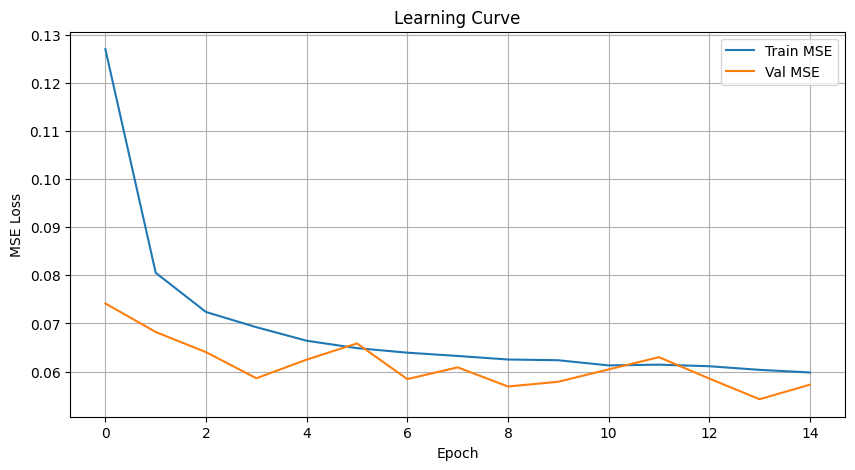

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train MSE')
plt.plot(val_losses, label='Val MSE')
plt.title("Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

In [56]:
model.eval()
test_losses = []

with torch.no_grad():
    for X_test_b, y_test_b in test_loader:
        X_test_b = X_test_b.to(device)
        y_test_b = y_test_b.to(device)

        preds_test = model(X_test_b)
        loss_test = criterion(preds_test, y_test_b)
        test_losses.append(loss_test.item())

final_test_mse = sum(test_losses) / len(test_losses)
print(f"Final Test MSE: {final_test_mse:.5f}")

Final Test MSE: 0.05370


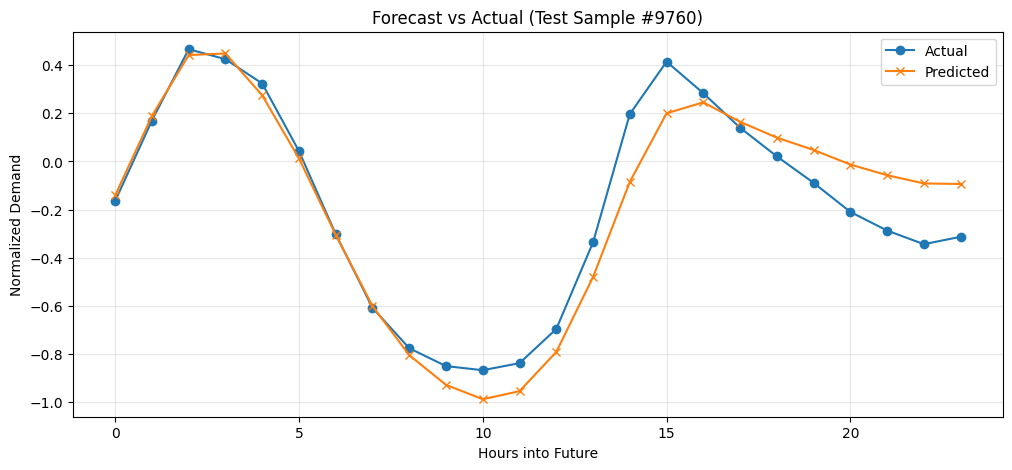

In [57]:
import matplotlib.pyplot as plt
import random

# Get predictions for the whole test set
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for X_b, y_b in test_loader:
        preds = model(X_b.to(device))
        all_preds.append(preds.cpu().numpy())
        all_targets.append(y_b.numpy())

import numpy as np
all_preds = np.concatenate(all_preds, axis=0)
all_targets = np.concatenate(all_targets, axis=0)

# Plot a random sample
idx = random.randint(0, len(all_preds) - 1)

plt.figure(figsize=(12, 5))
plt.plot(all_targets[idx], label='Actual', marker='o')
plt.plot(all_preds[idx], label='Predicted', marker='x')
plt.title(f"Forecast vs Actual (Test Sample #{idx})")
plt.xlabel("Hours into Future")
plt.ylabel("Normalized Demand")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()